<a href="https://colab.research.google.com/github/migvanderlei/rna-2-2/blob/main/PP2_2_3_Validac%CC%A7a%CC%83o_Cruzada_e_Busca_em_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [2]:
data = pd.read_csv("covtype.csv")

y = data["Cover_Type"]
X = data.drop(["Cover_Type"], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

> Todas as redes performaram melhor com a presença dos atributos categóricos.

> Todas as redes tiveram seus desempenhos avaliados em **3** repetições.

**Rede 5**
- F1: 0.759 +- 0.005506840713481243
- Acc: 0.845 +- 0.004064990172858894

**Rede 10**
- F1: 0.743 +- 0.012772489305112678
- Acc: 0.844 +- 0.003981117746932254

**Rede 2**
- F1: 0.728 +- 0.004562460318191036
- Acc: 0.828 +- 0.0027494327454018813

**Rede 2-3**
- F1: 0.703 +- 0.0049910579377315046
- Acc: 0.814 +- 0.0023176902015774356

**Rede 5-3**
- F1: 0.677 +- 0.00631193642388777
- Acc: 0.797 +- 0.003866655143308349

**Rede 8-3**
- F1: 0.671 +- 0.0062992223764265776
- Acc: 0.798 +- 0.003652576181228427

In [3]:
top_6 = [
         ("rede_2", MLPClassifier(hidden_layer_sizes=(10, 50), solver='adam', max_iter=200, activation='tanh')),
         ("rede_5", MLPClassifier(hidden_layer_sizes=(25, 30), solver='adam', max_iter=200, activation='relu')),
         ("rede_10", MLPClassifier(hidden_layer_sizes=(20, 40), solver='adam', max_iter=200, activation='relu')),
         ("rede_5-3", MLPClassifier(hidden_layer_sizes=25, solver='adam', max_iter=200, activation='relu')),
         ("rede_2-3", MLPClassifier(hidden_layer_sizes=25, solver='adam', max_iter=200, activation='tanh')),
         ("rede_8-3", MLPClassifier(hidden_layer_sizes=25, solver='adam', max_iter=200, activation='relu'))
]

In [18]:
params = {
    'solver': ['adam', 'sgd'],
    'batch_size': [500, 1000],
    'learning_rate_init': [0.0001, 0.01],
    'n_iter_no_change': [10, 5],
    'max_iter': [200, 100]
}

In [20]:
results = {}

for name, clf in top_6:
  print(name)
  search = GridSearchCV(clf, params, cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')
  search.fit(X_train_std, y_train)

  results[name] = search.cv_results_

rede_2
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 6.7min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 7.1min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=sgd; total time= 3.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=adam; total time= 2.1min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=adam; total time= 3.4min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.8min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=sgd; total time= 3.9min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 7.2min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=10

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 6.9min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=adam; total time= 3.7min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam; total time= 3.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 7.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=adam; total time= 3.1min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 6.7min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 6.6min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_it

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 6.9min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=adam; total time= 3.7min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam; total time= 3.4min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=adam; total time= 1.8min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=adam; total time= 3.8min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.8min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 7.0min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_i

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

rede_5
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


rede_10
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


rede_5-3
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

rede_2-3
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 5.1min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=adam; total time= 2.6min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=adam; total time= 2.6min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 4.9min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=adam; total time= 2.8min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=sgd; total time= 2.4min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 4.3min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=adam; total time= 2.3min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_i

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 5.2min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 2.5min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 2.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam; total time= 3.4min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 3.9min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=adam; total time= 1.1min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 4.5min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 4.6min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_it

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 7.1min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.6min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=adam; total time= 3.8min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 7.6min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=adam; total time= 3.2min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=adam; total time= 2.7min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 7.1min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 6.7min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_it

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 6.3min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 7.0min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=adam; total time= 3.7min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 7.4min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.9min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 6.7min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=adam; total time= 3.7min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 3.4min
[CV] END batch_size=1000, learning_rate_init=0.01, max_it

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 4.9min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 4.9min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=adam; total time= 2.6min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 4.9min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=adam; total time= 1.1min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=5, solver=sgd; total time= 2.4min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 4.5min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=10, solver=adam; total time= 2.2min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 6.3min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 7.6min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=sgd; total time= 3.5min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=adam; total time= 1.7min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 7.5min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 7.1min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 7.2min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=adam; total time= 3.5min
[CV] END batch_size=1000, learning_rate_init=0.01, max_ite

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/skle

[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=sgd; total time= 4.8min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=adam; total time= 5.1min
[CV] END batch_size=500, learning_rate_init=0.0001, max_iter=100, n_iter_no_change=5, solver=sgd; total time= 2.4min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=200, n_iter_no_change=5, solver=adam; total time= 1.8min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=adam; total time= 2.0min
[CV] END batch_size=500, learning_rate_init=0.01, max_iter=100, n_iter_no_change=10, solver=sgd; total time= 2.6min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=10, solver=adam; total time= 4.5min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_iter=200, n_iter_no_change=5, solver=sgd; total time= 4.5min
[CV] END batch_size=1000, learning_rate_init=0.0001, max_ite

/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


rede_8-3
Fitting 3 folds for each of 32 candidates, totalling 96 fits


## Identificando a mellhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [37]:
for name in results.keys():
  print(name)
  rank = results[name]['rank_test_score']
  best_index = np.argmin(rank)
  print('best iteration:', best_index)
  print(results[name]['mean_test_score'][best_index])
  print('batch_size:', results[name]['param_batch_size'][best_index])
  print('learning_rate_init:', results[name]['param_learning_rate_init'][best_index])
  print('max_iter:', results[name]['param_max_iter'][best_index])
  print('n_iter_no_change:', results[name]['param_n_iter_no_change'][best_index])
  print('solver:', results[name]['param_solver'][best_index])
  print()

rede_2
best iteration: 28
0.7060187710670526
batch_size: 1000
learning_rate_init: 0.01
max_iter: 100
n_iter_no_change: 10
solver: adam

rede_5
best iteration: 28
0.7422511391718646
batch_size: 1000
learning_rate_init: 0.01
max_iter: 100
n_iter_no_change: 10
solver: adam

rede_10
best iteration: 28
0.7342182565670817
batch_size: 1000
learning_rate_init: 0.01
max_iter: 100
n_iter_no_change: 10
solver: adam

rede_5-3
best iteration: 28
0.6870738228993293
batch_size: 1000
learning_rate_init: 0.01
max_iter: 100
n_iter_no_change: 10
solver: adam

rede_2-3
best iteration: 11
0.6918837273617625
batch_size: 500
learning_rate_init: 0.01
max_iter: 200
n_iter_no_change: 5
solver: sgd

rede_8-3
best iteration: 10
0.6764520330178924
batch_size: 500
learning_rate_init: 0.01
max_iter: 200
n_iter_no_change: 5
solver: adam



In [38]:
for i in range(3):
  print(results['rede_5'][f'split{i}_test_score'][28])

0.744864168306964
0.7399422752216325
0.7419469739869972


Melhor rede: **Rede 5**

**Parâmetros**

- hidden_layer_sizes=(25, 30)
- activation='relu'

**Hiperparâmetros**
- batch_size: 1000
- learning_rate_init: 0.01
- max_iter: 100
- n_iter_no_change: 10
- solver: adam


F1 médio: 0.742

F1 por split:
- 0.744864168306964
- 0.7399422752216325
- 0.7419469739869972

## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [39]:
X_std = (X - np.mean(X))/np.std(X)

In [41]:
clf = MLPClassifier(hidden_layer_sizes=(25, 30), solver='adam', max_iter=100, activation='relu', batch_size=1000, learning_rate_init=0.01, n_iter_no_change=10)

In [42]:
clf.fit(X_std, y)

MLPClassifier(batch_size=1000, hidden_layer_sizes=(25, 30),
              learning_rate_init=0.01, max_iter=100)

In [43]:
from joblib import dump, load

In [44]:
dump(clf, 'forest_model.joblib') 

['forest_model.joblib']

In [45]:
clf = load('forest_model.joblib') 

In [48]:
y_pred = clf.predict(X_std)

<AxesSubplot:>

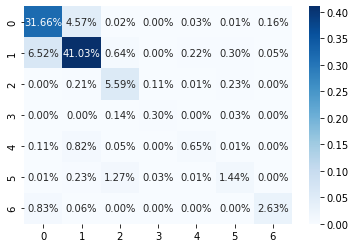

In [49]:
cf_matrix = confusion_matrix(y_pred=y_pred, y_true=y)
sns.heatmap(cf_matrix/np.sum(cf_matrix),
            annot=True, fmt='.2%', cmap='Blues')